<a href="https://colab.research.google.com/github/IonutCiprian/BDA/blob/main/Twitter_Sentiment_Analysis_using_Python_in_Google_Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Upload de fisier csv
from google.colab import files

uploaded = files.upload()

In [14]:
#Citeste csv-ul uploadat
import pandas as pd

df = pd.read_csv("Sentiment Analysis Dataset_exported.csv")

In [16]:
#Afiseaza primele 2 randuri
df.head(4)


,textID,text,rating,sentiment,Time of Tweet,Age of User,Country,Population,Land Area (Km²),Density (P/Km²)
0,f87dea47db,Last session of the day http://twitpic.com/67ezh,4,neutral,morning,24,Afghanistan,38928346,652860,60
1,96d74cb729,Shanghai is also really exciting (precisely -...,1,positive,noon,26,Albania,2877797,27400,105
2,eee518ae67,"Recession hit Veronique Branquinho, she has to...",1,negative,night,43,Algeria,43851044,2381740,18
3,01082688c6,happy bday!,2,positive,morning,67,Andorra,77265,470,164


In [ ]:
#Afiseaza primele 100 randuri
df.head(100)

,textID,text,rating,sentiment,Time of Tweet,Age of User,Country,Population,Land Area (Km²),Density (P/Km²),Sentiment Score,Sentiment Label
0,f87dea47db,Last session of the day http://twitpic.com/67ezh,4,neutral,morning,24,Afghanistan,38928346,652860,60,0.0000,Neutral
1,96d74cb729,Shanghai is also really exciting (precisely -...,1,positive,noon,26,Albania,2877797,27400,105,0.7501,Positive
2,eee518ae67,"Recession hit Veronique Branquinho, she has to...",1,negative,night,43,Algeria,43851044,2381740,18,-0.7345,Negative
3,01082688c6,happy bday!,2,positive,morning,67,Andorra,77265,470,164,0.6114,Positive
4,33987a8ee5,http://twitpic.com/4w75p - I like it!!,5,positive,noon,66,Angola,32866272,1246700,26,0.4738,Positive
...,...,...,...,...,...,...,...,...,...,...,...,...
95,71fa60d9ff,was so excited to eat the wartermelon i bought...,1,neutral,night,57,Lesotho,2142249,30360,71,-0.4380,Negative
96,c238c4dbb7,i just watched Marley & Me...i cried so hard!,3,negative,morning,31,Liberia,5057681,96320,53,-0.5801,Negative
97,dc73e85417,Take antibacterial to school to clean your han...,1,neutral,noon,51,Libya,6871292,1759540,4,0.4019,Positive
98,af63915fa9,I`m leaving work now. Trying to decide if I re...,6,neutral,night,57,Liechtenstein,38128,160,238,0.0000,Neutral


In [ ]:
import numpy as np
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sid = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [ ]:
# Analiza textului
df['text'] = df['text'].replace(np.nan, '', regex=True)

sentiment_scores = []
for text in df['text']:
  scores = sid.polarity_scores(text)
  sentiment_scores.append(scores['compound'])

df['Sentiment Score'] = sentiment_scores

In [ ]:
# Clasificarea scorului
def get_sentiment_label(score):
  if score >= 0.01:
    return 'Positive'
  if score <= -0.01:
    return 'Negative'
  else:
    return 'Neutral'

sentiment_labels = df['Sentiment Score'].apply(get_sentiment_label)

df['Sentiment Label'] = sentiment_labels



In [ ]:
#Vizualizam cele 2 noi coloane
df.head(10)

,textID,text,rating,sentiment,Time of Tweet,Age of User,Country,Population,Land Area (Km²),Density (P/Km²),Sentiment Score,Sentiment Label
0,f87dea47db,Last session of the day http://twitpic.com/67ezh,4,neutral,morning,24,Afghanistan,38928346,652860,60,0.0000,Neutral
1,96d74cb729,Shanghai is also really exciting (precisely -...,1,positive,noon,26,Albania,2877797,27400,105,0.7501,Positive
2,eee518ae67,"Recession hit Veronique Branquinho, she has to...",1,negative,night,43,Algeria,43851044,2381740,18,-0.7345,Negative
3,01082688c6,happy bday!,2,positive,morning,67,Andorra,77265,470,164,0.6114,Positive
4,33987a8ee5,http://twitpic.com/4w75p - I like it!!,5,positive,noon,66,Angola,32866272,1246700,26,0.4738,Positive
5,726e501993,that`s great!! weee!! visitors!,1,positive,night,23,Antigua and Barbuda,97929,440,223,0.7405,Positive
6,261932614e,I THINK EVERYONE HATES ME ON HERE lol,3,negative,morning,22,Argentina,45195774,2736690,17,-0.2103,Negative
7,afa11da83f,"soooooo wish i could, but im in school and my...",2,negative,noon,39,Armenia,2963243,28470,104,-0.3048,Negative
8,e64208b4ef,and within a short time of the last clue all ...,5,neutral,night,48,Australia,25499884,7682300,3,0.0000,Neutral
9,37bcad24ca,What did you get? My day is alright.. haven`...,6,neutral,morning,62,Austria,9006398,82400,109,0.0000,Neutral


In [ ]:
# Exemplu de creare și exportare a unui DataFrame
import pandas as pd

# Salvare DataFrame într-un fișier CSV
df.to_csv('Sentiment Analysis Dataset_exported.csv', index=False)

# Descărcare fișier
from google.colab import files
files.download('Sentiment Analysis Dataset_exported.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
temp = df.groupby('sentiment').count()['text'].reset_index().sort_values(by='text', ascending=False)
temp.style.background_gradient(cmap='Purples')

,sentiment,text
1,neutral,1430
2,positive,1103
0,negative,1001


<ipython-input-144-dce359adabd9>:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




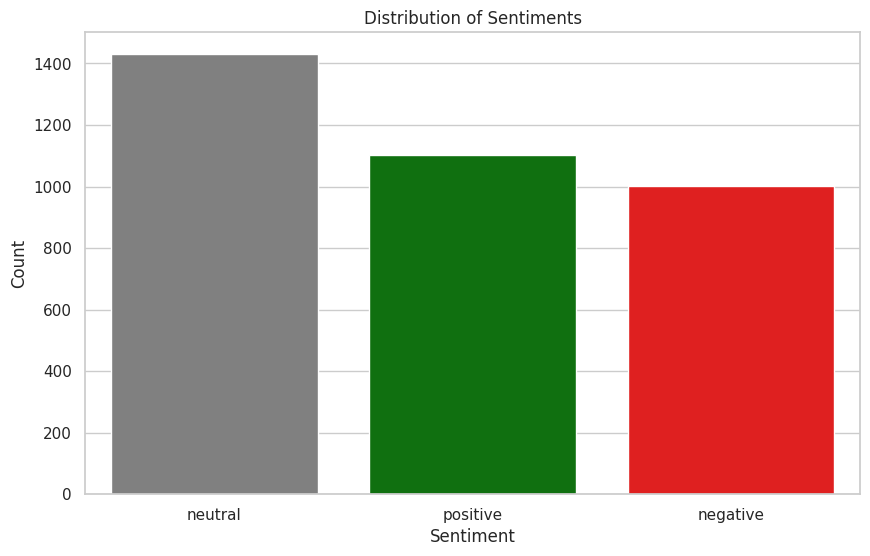

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='sentiment', data=df, palette={'positive': 'green', 'neutral': 'gray', 'negative': 'red'})
plt.title('Distribution of Sentiments')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

In [ ]:
fig = go.Figure(go.Funnelarea(
    text =temp.sentiment,
    values = temp.text,
    title = {"position": "top center", "text": "Funnel-Chart of Sentiment Distribution"}
    ))
fig.show()

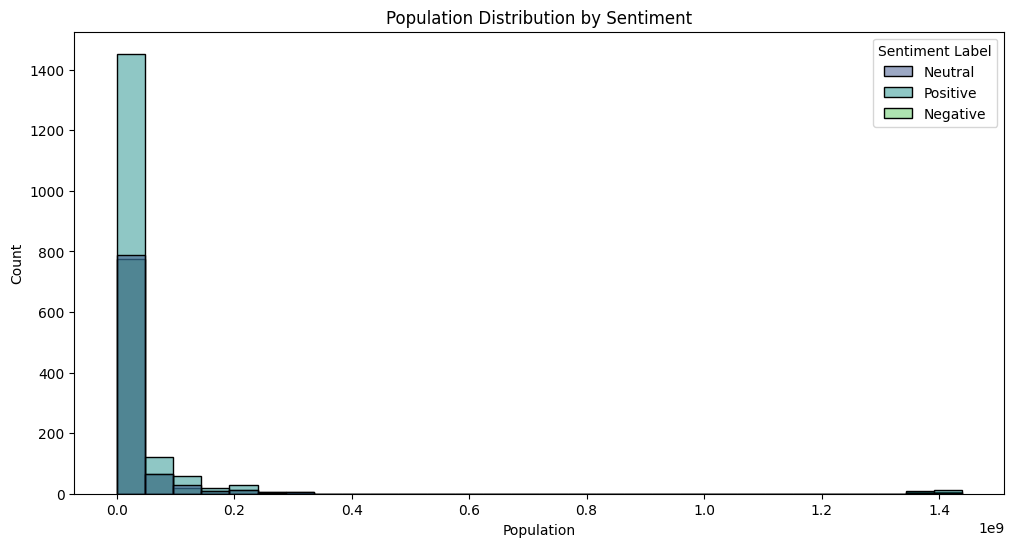

In [ ]:
plt.figure(figsize=(12, 6))
sns.histplot(x='Population', data=df, hue='Sentiment Label', bins=30, palette='viridis')
plt.title('Population Distribution by Sentiment')
plt.xlabel('Population')
plt.ylabel('Count')
plt.show()

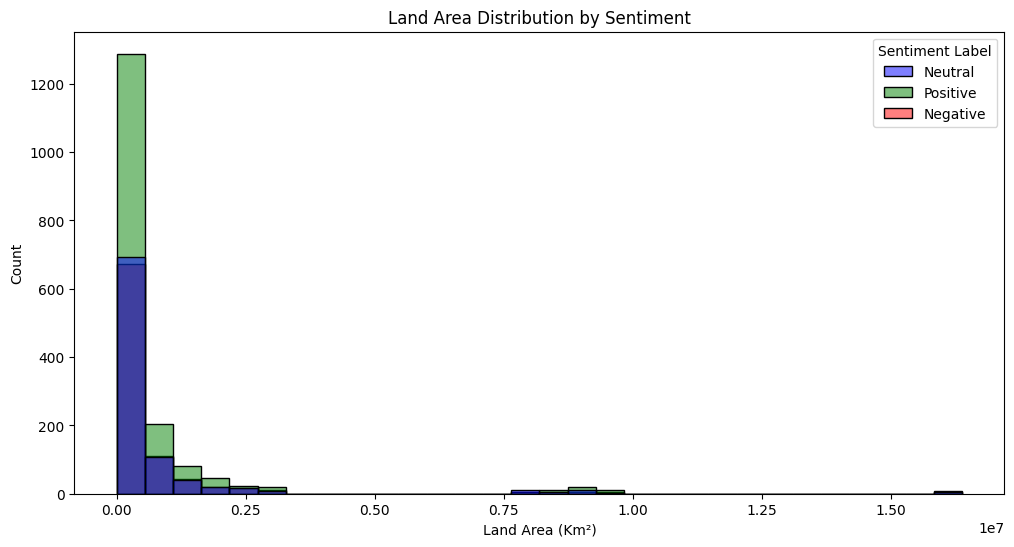

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Setăm o paletă de culori personalizată
colors = {'Positive': 'green', 'Neutral': 'blue', 'Negative': 'red'}

# Plotează histograma cu paleta de culori personalizată
plt.figure(figsize=(12, 6))
sns.histplot(x='Land Area (Km²)', data=df, hue='Sentiment Label', bins=30, palette=colors)
plt.title('Land Area Distribution by Sentiment')
plt.xlabel('Land Area (Km²)')
plt.ylabel('Count')
plt.show()

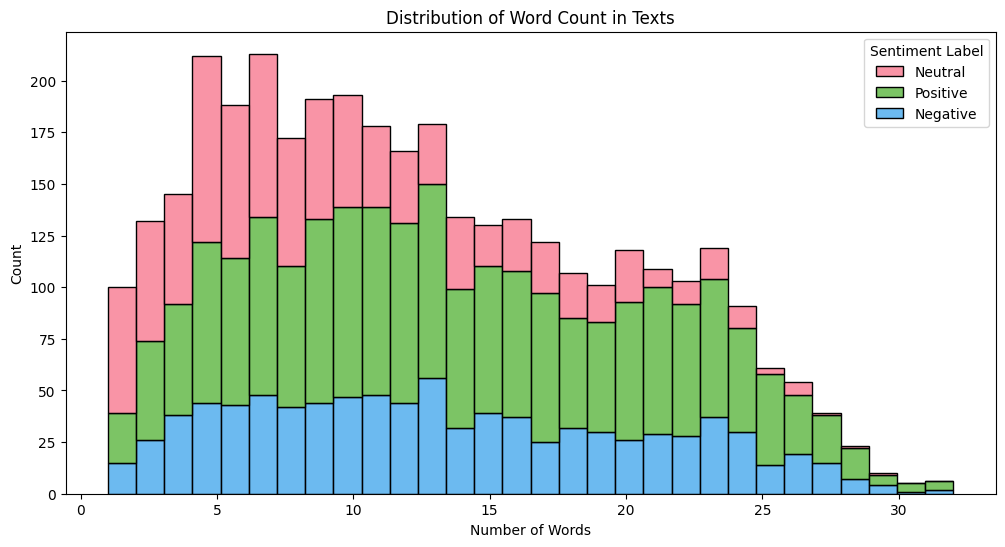

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Adaugă o coloană pentru numărul de cuvinte în fiecare text
df['Word Count'] = df['text'].apply(lambda x: len(str(x).split()))

# Plotează un histogramă pentru distribuția numărului de cuvinte cu culori diferite pentru fiecare categorie de sentiment
plt.figure(figsize=(12, 6))
sns.histplot(x='Word Count', data=df, bins=30, hue='Sentiment Label', palette='husl', multiple='stack')
plt.title('Distribution of Word Count in Texts')
plt.xlabel('Number of Words')
plt.ylabel('Count')
plt.show()

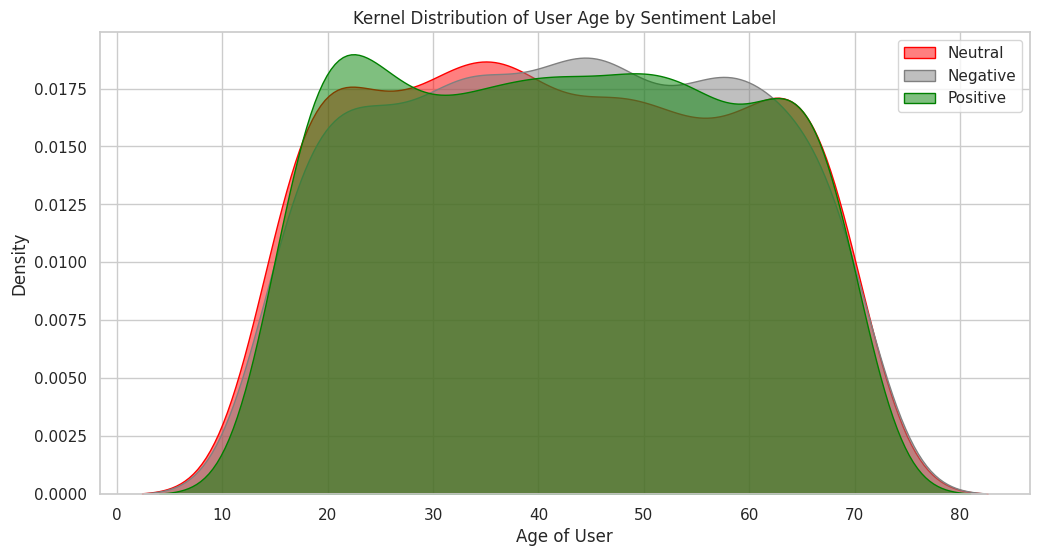

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Creează un subconjunct de date pentru fiecare categorie de sentiment
neutral_data = df[df['Sentiment Label'] == 'Neutral']
negative_data = df[df['Sentiment Label'] == 'Negative']
positive_data = df[df['Sentiment Label'] == 'Positive']

# Setează stilul pentru plotare
sns.set(style="whitegrid")

# Creează un subplot cu o singură figură
plt.figure(figsize=(12, 6))

# Plotează distribuția de densitate a vârstei utilizatorilor pentru fiecare categorie de sentiment
sns.kdeplot(data=neutral_data, x='Age of User', fill=True, color='red', label='Neutral', alpha=0.5)
sns.kdeplot(data=negative_data, x='Age of User', fill=True, color='gray', label='Negative', alpha=0.5)
sns.kdeplot(data=positive_data, x='Age of User', fill=True, color='green', label='Positive', alpha=0.5)

# Adaugă titlul și etichetele pentru axe
plt.title('Kernel Distribution of User Age by Sentiment Label')
plt.xlabel('Age of User')
plt.ylabel('Density')

# Adaugă legenda pentru culori
plt.legend()

# Afișează plotul
plt.show()

In [ ]:
pip install nltk

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


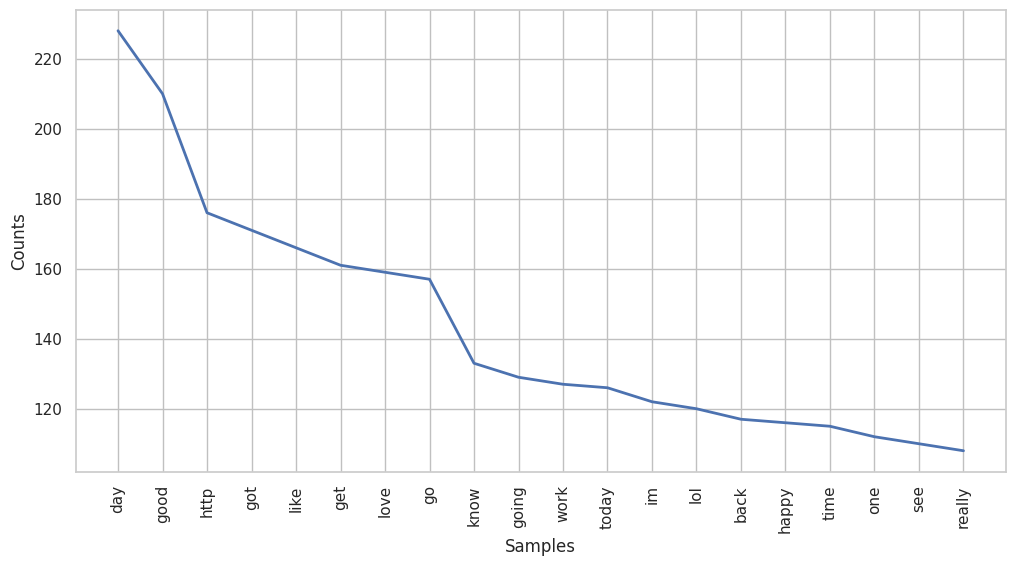

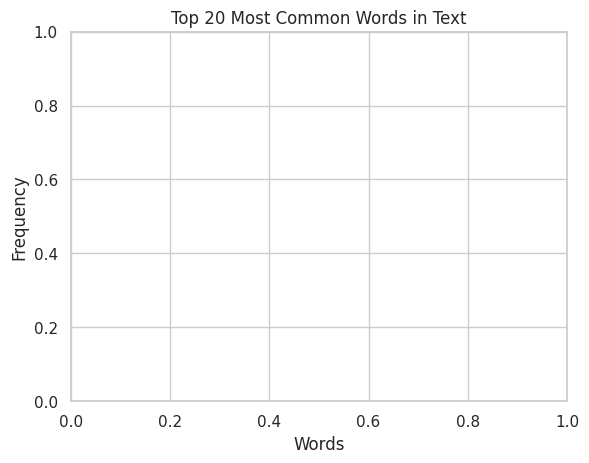

In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
import matplotlib.pyplot as plt

# Descarcă stop-words și tokenizatorul
nltk.download('stopwords')
nltk.download('punkt')

# Obține stop-words pentru limba engleză
stop_words = set(stopwords.words('english'))

# Concatenează textul
text_data = ' '.join(df['text'])

# Tokenizează textul
words = word_tokenize(text_data)

# Elimină stop-words și cuvintele scurte
filtered_words = [word.lower() for word in words if word.isalpha() and word.lower() not in stop_words and len(word) > 1]

# Calculează frecvența cuvintelor
freq_dist = FreqDist(filtered_words)

# Afișează cele mai frecvente 20 de cuvinte
plt.figure(figsize=(12, 6))
freq_dist.plot(20, cumulative=False)
plt.title('Top 20 Most Common Words in Text')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.show()

In [ ]:
from collections import Counter
import pandas as pd
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Descarcă stop-words și tokenizatorul
nltk.download('stopwords')
nltk.download('punkt')

# Obține stop-words pentru limba engleză
stop_words = set(stopwords.words('english'))

# Creează o nouă coloană 'temp_list' în DataFrame-ul df, care conține liste de cuvinte pentru fiecare rând din 'text'
df['temp_list'] = df['text'].apply(lambda x: word_tokenize(str(x)))

# Elimină stop-words și cuvintele scurte din 'temp_list'
df['temp_list'] = df['temp_list'].apply(lambda x: [word.lower() for word in x if word.isalpha() and word.lower() not in stop_words and len(word) > 1])

# Calculează frecvența cuvintelor în 'temp_list'
top_words = Counter([item for sublist in df['temp_list'] for item in sublist])

# Creează un DataFrame cu cele mai comune 20 de cuvinte
temp = pd.DataFrame(top_words.most_common(20), columns=['Common_words', 'count'])

# Afișează DataFrame-ul cu un gradient de culoare în stilul Blues
temp.style.background_gradient(cmap='Blues')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,Common_words,count
0,day,228
1,good,210
2,http,176
3,got,171
4,like,166
5,get,161
6,love,159
7,go,157
8,know,133
9,going,129


In [ ]:
import plotly.express as px
fig = px.bar(temp, x="count", y="Common_words", title='Commmon Words in Selected Text', orientation='h',
             width=700, height=700, color='Common_words')
fig.show()

In [ ]:
fig = px.treemap(temp, path=['Common_words'], values='count',title='Tree of Most Common Words')
fig.show()

In [ ]:
# Extrage cuvintele pentru fiecare sentiment
positive_words = [word for sublist in df[df['sentiment']=='positive']['temp_list'] for word in sublist]
negative_words = [word for sublist in df[df['sentiment']=='negative']['temp_list'] for word in sublist]
neutral_words = [word for sublist in df[df['sentiment']=='neutral']['temp_list'] for word in sublist]

# Calculează frecvența cuvintelor pentru fiecare sentiment
top_positive = Counter(positive_words)
top_negative = Counter(negative_words)
top_neutral = Counter(neutral_words)

# Crează DataFrame-uri pentru cele mai comune cuvinte
temp_positive = pd.DataFrame(top_positive.most_common(20), columns=['Common_words', 'count'])
temp_negative = pd.DataFrame(top_negative.most_common(20), columns=['Common_words', 'count'])
temp_neutral = pd.DataFrame(top_neutral.most_common(20), columns=['Common_words', 'count'])

# Afișează cele mai comune cuvinte pentru fiecare sentiment
temp_positive.style.background_gradient(cmap='Greens')
temp_negative.style.background_gradient(cmap='Reds')
temp_neutral.style.background_gradient(cmap='Blues')

,Common_words,count
0,http,85
1,go,73
2,got,72
3,get,68
4,know,68
5,lol,62
6,like,60
7,day,55
8,work,54
9,back,53


In [ ]:
# Selecția doar a rândurilor cu sentiment negativ
negative_rows = df[df['sentiment'] == 'negative']

# Crearea unei liste de cuvinte pentru fiecare rând
negative_words = [word.lower() for text in negative_rows['text'] for word in text.split()]

# Calcularea frecvenței cuvintelor
top_negative = Counter(negative_words)

# Crearea unui DataFrame pentru cele mai comune 20 de cuvinte negative
temp_negative = pd.DataFrame(top_negative.most_common(20), columns=['Common_words', 'count'])
temp_negative.style.background_gradient(cmap='Reds')

,Common_words,count
0,i,586
1,to,338
2,the,314
3,my,270
4,a,230
5,and,204
6,is,155
7,it,132
8,in,128
9,of,119


In [ ]:
# Selecția doar a rândurilor cu sentiment pozitiv
positive_rows = df[df['sentiment'] == 'positive']

# Crearea unei liste de cuvinte pentru fiecare rând
positive_words = [word for text in positive_rows['text'] for word in text.split()]

# Calcularea frecvenței cuvintelor
top_positive = Counter(positive_words)

# Crearea unui DataFrame pentru cele mai comune 20 de cuvinte pozitive
temp_positive = pd.DataFrame(top_positive.most_common(20), columns=['Common_words', 'count'])
temp_positive.style.background_gradient(cmap='Greens')

,Common_words,count
0,to,343
1,the,338
2,I,333
3,a,262
4,you,195
5,and,181
6,i,176
7,my,160
8,for,154
9,it,130


In [ ]:
# Funcție pentru a extrage cuvintele unice dintr-un text dat
def words_unique(sentiment, top_n, text_data):
    # Filtrare tweet-uri în funcție de sentiment
    sentiment_rows = df[df['sentiment'] == sentiment]

    # Creare listă cuvinte pentru fiecare tweet
    words_list = [word for sublist in sentiment_rows[text_data].apply(lambda x: str(x).split()) for word in sublist]

    # Calcul frecvență cuvinte
    top_words = Counter(words_list)

    # Creare DataFrame cu cele mai comune top_n cuvinte
    top_df = pd.DataFrame(top_words.most_common(top_n), columns=['Common_words', 'count'])

    return top_df

# Apelare funcție pentru cele mai comune 20 de cuvinte unice în tweet-urile pozitive
Unique_Positive = words_unique('positive', 20, 'text')
print("Cele mai comune 20 de cuvinte unice în tweet-urile pozitive sunt:")
print(Unique_Positive)

Cele mai comune 20 de cuvinte unice în tweet-urile pozitive sunt:
   Common_words  count
0            to    343
1           the    338
2             I    333
3             a    262
4           you    195
5           and    181
6             i    176
7            my    160
8           for    154
9            it    130
10           is    129
11           in    122
12           of    110
13         love    103
14           so     98
15           be     94
16          was     91
17         good     90
18           on     87
19         that     80


In [ ]:
pip install palettable

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 332.3/332.3 kB 4.9 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from palettable.colorbrewer.qualitative import Pastel1_7

# Presupunând că ai definit deja DataFrame-ul Unique_Positive

plt.figure(figsize=(16, 10))
my_circle = plt.Circle((0, 0), 0.7, color='white')
plt.pie(Unique_Positive['count'], labels=Unique_Positive['text'], colors=Pastel1_7.hex_colors)
p = plt.gcf()
p.gca().add_artist(my_circle)

plt.title('DoNut Plot Of Unique Positive Words')
plt.show()

KeyError: 'text'

<Figure size 1600x1000 with 0 Axes>

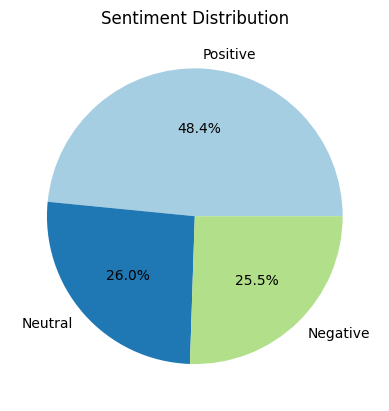

In [ ]:
# Numărarea de revizuiri
sentiment_counts = df['Sentiment Label'].value_counts()

# Creează o paletă de culori pentru fiecare segment
colors = plt.cm.Paired(range(len(sentiment_counts)))

# Creează diagrama tip pie cu culori diferite
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', colors=colors)
plt.title('Sentiment Distribution')
plt.show()

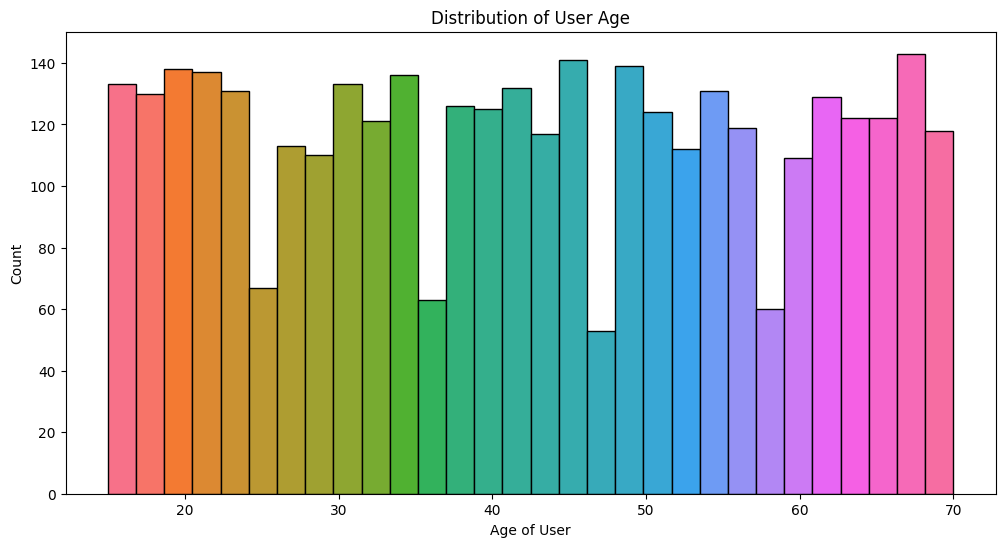

In [ ]:
# Definirea unei palete de culori personalizate
palette = sns.color_palette("husl", 30)  # Schimbă 30 cu numărul de benzi dorit

# Plotează histograma cu culori diferite pentru fiecare bară
plt.figure(figsize=(12, 6))
n, bins, patches = plt.hist(df['Age of User'], bins=30, edgecolor='black')

# Setează culoarea pentru fiecare bară
for i in range(len(patches)):
    patches[i].set_facecolor(palette[i])

plt.title('Distribution of User Age')
plt.xlabel('Age of User')
plt.ylabel('Count')
plt.show()

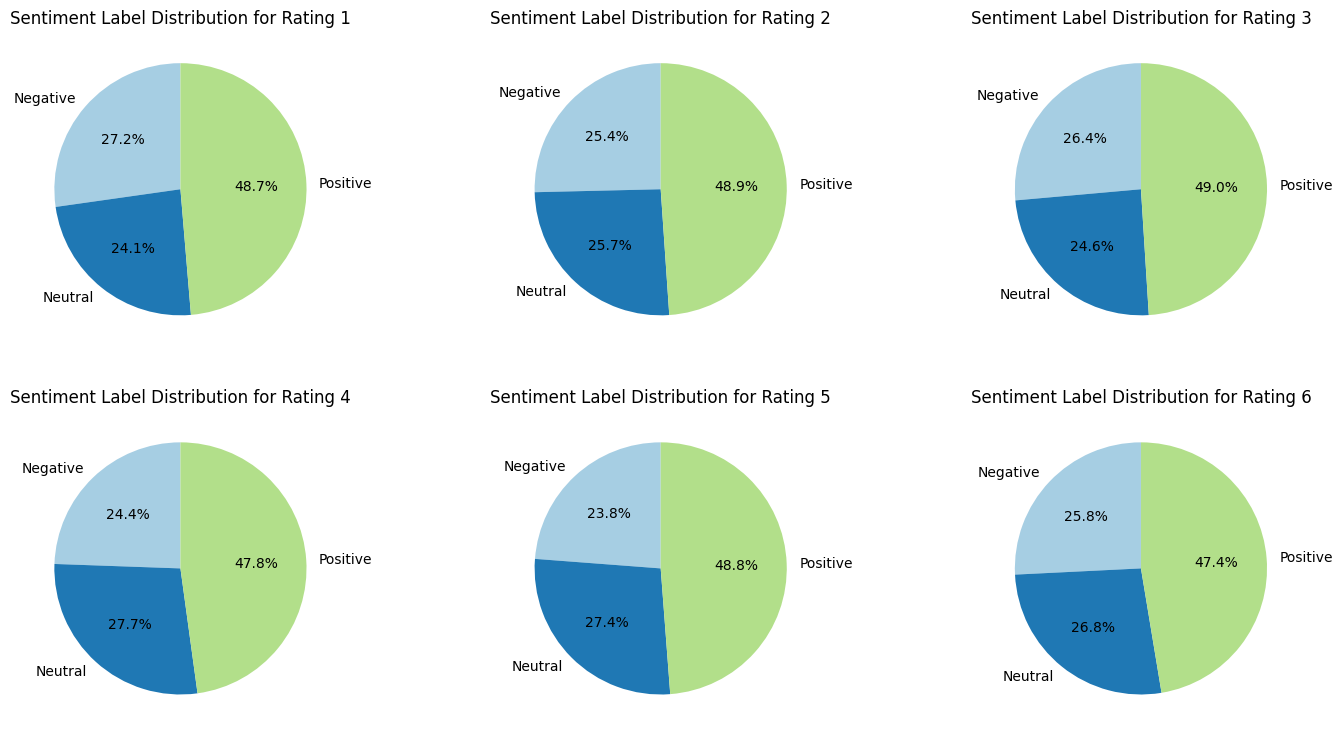

In [ ]:
# Asigură-te că ai definit DataFrame-ul și ai grupat datele în funcție de rating și eticheta de sentiment
grouped = df.groupby(['rating', 'Sentiment Label']).size().reset_index(name='Count')

# Creează o paletă de culori pentru fiecare segment
colors = plt.cm.Paired(range(len(grouped)))

# Creează o figură cu subgrafice pentru fiecare rating
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 8))

# Iterează prin fiecare rating și plotează diagrama tip pie corespunzătoare cu culori diferite
for rating, ax in zip(range(1, 7), axes.flatten()):
    data = grouped[grouped['rating'] == rating]
    ax.pie(data['Count'], labels=data['Sentiment Label'], autopct='%1.1f%%', colors=colors, startangle=90)
    ax.set_title(f'Sentiment Label Distribution for Rating {rating}')

# Ajustează layout-ul pentru a evita suprapunerea și a face subgraficele pentru rating-ul 5 mai mici
plt.tight_layout(pad=3.0)

# Afișează diagrama
plt.show()

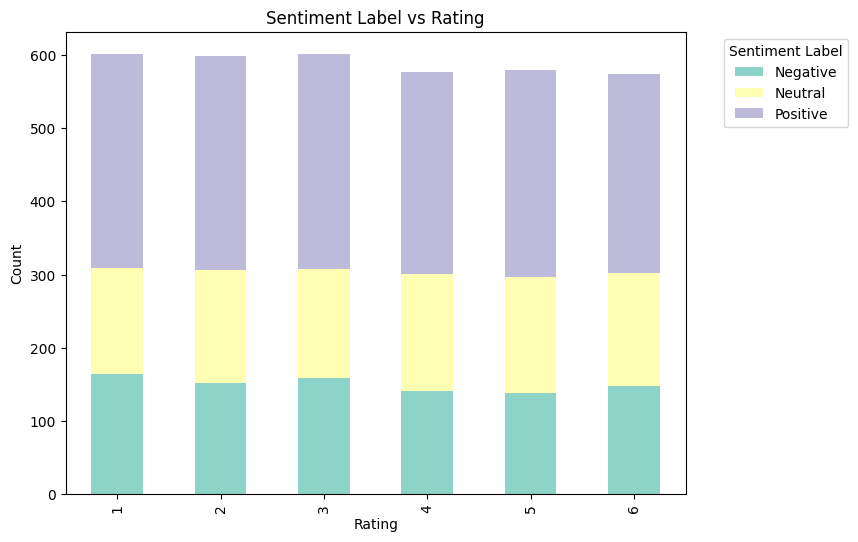

In [ ]:
# Creează un tabel de frecvență pentru rating și etichetele de sentiment
table = pd.crosstab(df['rating'], df['Sentiment Label'])

# Alege o paletă de culori
colors = plt.cm.Set3(np.arange(len(df['Sentiment Label'].unique())))

# Plotează un grafic de bare apilat cu culori diferite
table.plot(kind='bar', stacked=True, figsize=(8, 6), color=colors)

plt.title('Sentiment Label vs Rating')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.legend(title='Sentiment Label', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

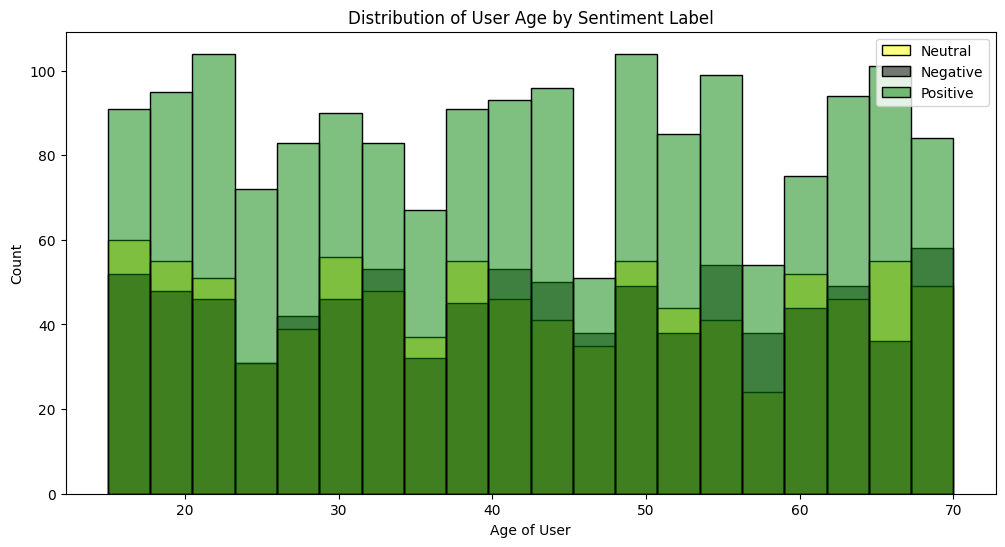

In [ ]:
# Asigură-te că ai importat librăriile necesare și ai definit DataFrame-ul și coloanele corect

# Definește culorile pentru fiecare categorie de sentiment
colors = {'Neutral': 'yellow', 'Negative': 'black', 'Positive': 'green'}

# Plotează distribuția vârstelor pentru fiecare categorie de sentiment cu culori distincte
plt.figure(figsize=(12, 6))
sns.histplot(x='Age of User', data=df[df['Sentiment Label'] == 'Neutral'], bins=20, color=colors['Neutral'], label='Neutral', alpha=0.5)
sns.histplot(x='Age of User', data=df[df['Sentiment Label'] == 'Negative'], bins=20, color=colors['Negative'], label='Negative', alpha=0.5)
sns.histplot(x='Age of User', data=df[df['Sentiment Label'] == 'Positive'], bins=20, color=colors['Positive'], label='Positive', alpha=0.5)

plt.title('Distribution of User Age by Sentiment Label')
plt.xlabel('Age of User')
plt.ylabel('Count')
plt.legend()
plt.show()

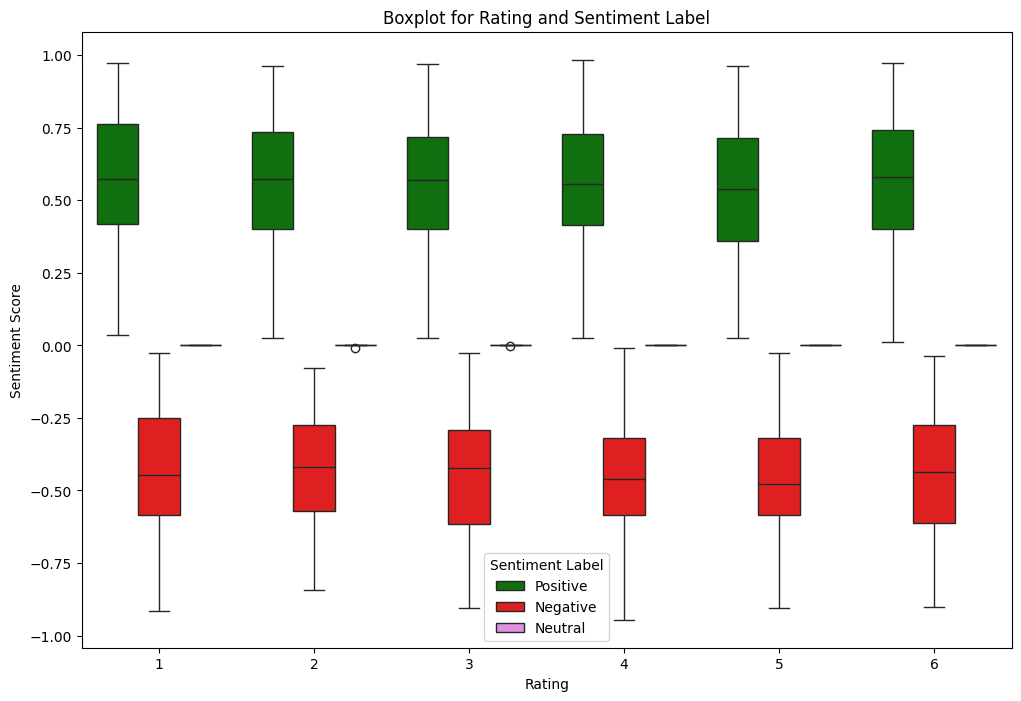

In [ ]:
# Asigură-te că toate etichetele sunt în format corect
df['Sentiment Label'] = df['Sentiment Label'].str.capitalize()

# Definirea unei palete de culori personalizate
palette = {'Positive': 'green', 'Neutral': 'violet', 'Negative': 'red'}

# Diagramă de tip Boxplot pentru Rating și Sentiment Label cu Culori Diferite:
plt.figure(figsize=(12, 8))
sns.boxplot(x='rating', y='Sentiment Score', hue='Sentiment Label', data=df, palette=palette)
plt.title('Boxplot for Rating and Sentiment Label')
plt.xlabel('Rating')
plt.ylabel('Sentiment Score')
plt.show()

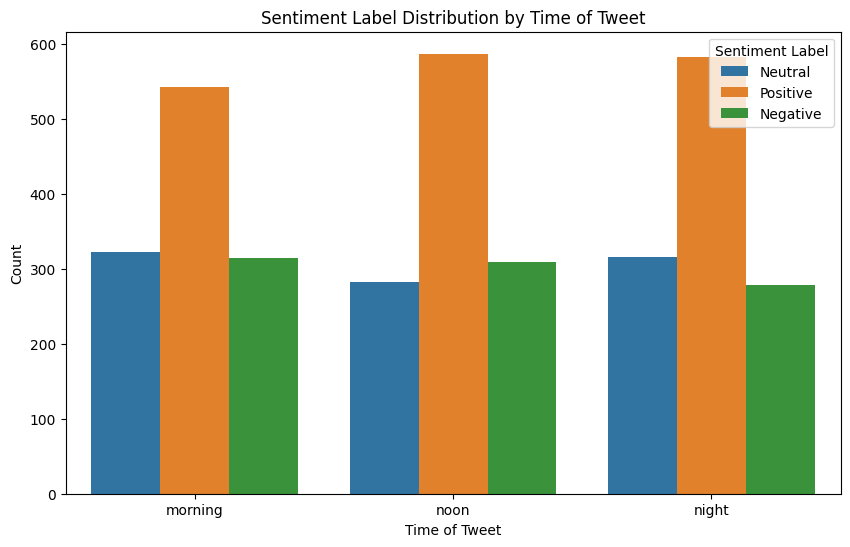

In [ ]:
#Diagramă de tip Bar pentru Sentiment Label în funcție de Time of Tweet:
plt.figure(figsize=(10, 6))
sns.countplot(x='Time of Tweet', hue='Sentiment Label', data=df)
plt.title('Sentiment Label Distribution by Time of Tweet')
plt.xlabel('Time of Tweet')
plt.ylabel('Count')
plt.show()

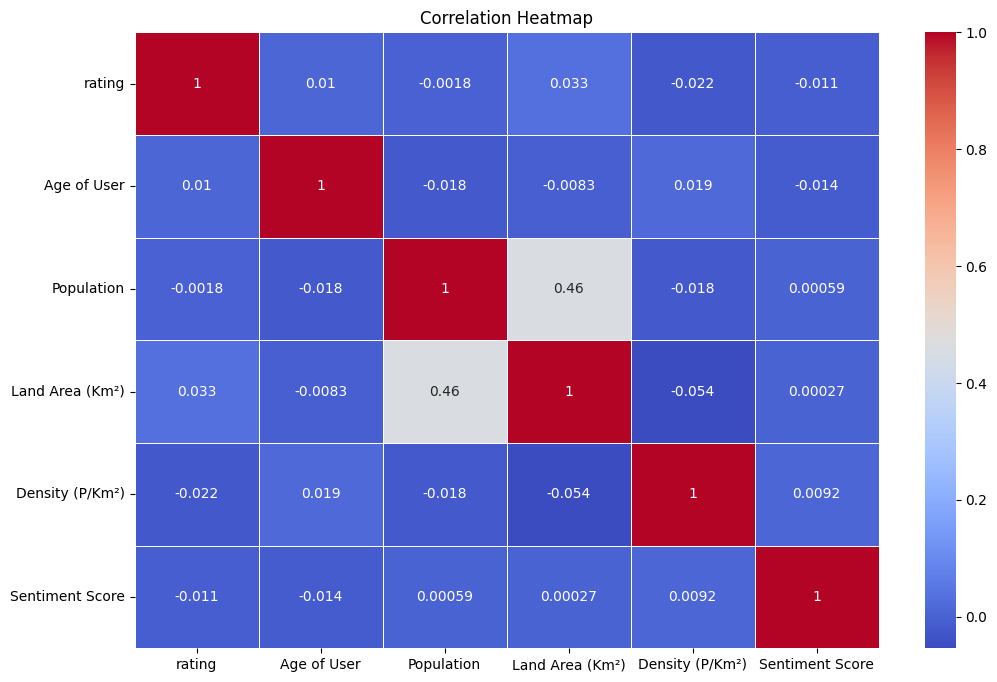

In [ ]:
#Diagramă de tip Heatmap pentru Corelații:
corr_matrix = df.corr(numeric_only=True)
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

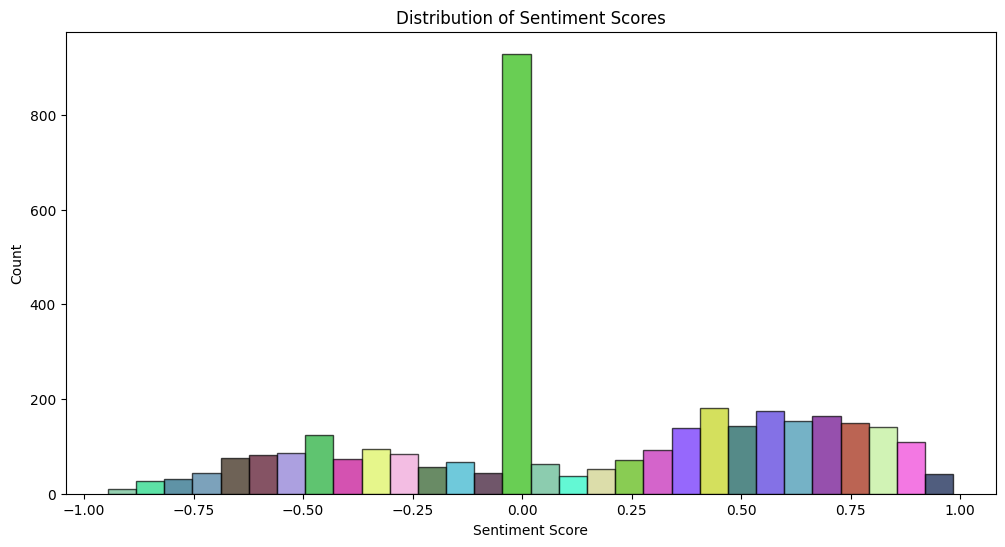

In [ ]:
#Histogramă a Sentiment Score:
plt.figure(figsize=(12, 6))

num_bins = 30
colors = np.random.rand(num_bins, 3)  # Generează culori aleatorii RGB pentru fiecare bară
n, bins, patches = plt.hist(df['Sentiment Score'], bins=num_bins, edgecolor='black', alpha=0.7)

# Atribuie culori diferite pentru fiecare bin
for patch, color in zip(patches, colors):
    patch.set_facecolor(color)

plt.title('Distribution of Sentiment Scores')
plt.xlabel('Sentiment Score')
plt.ylabel('Count')
plt.show()

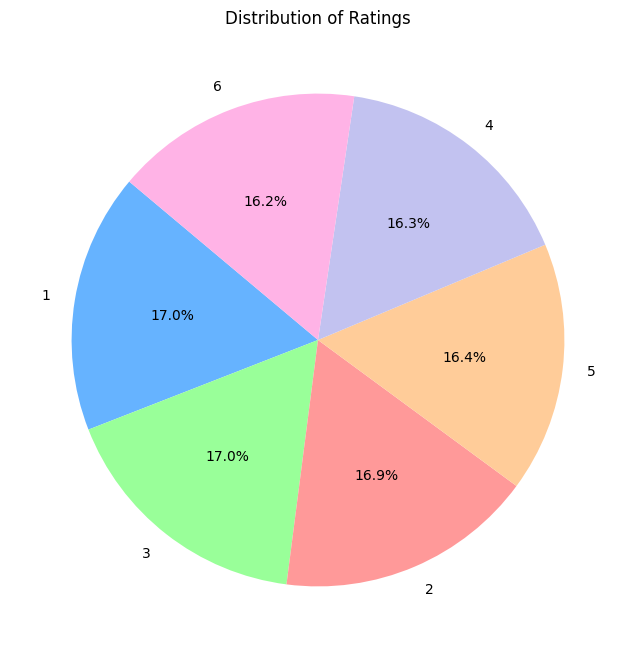

In [ ]:
#Diagramă de Tip Pie pentru Distribuția Rating:
plt.figure(figsize=(8, 8))
rating_counts = df['rating'].value_counts()
plt.pie(rating_counts, labels=rating_counts.index, autopct='%1.1f%%', startangle=140, colors=['#66b3ff','#99ff99','#ff9999','#ffcc99','#c2c2f0','#ffb3e6'])
plt.title('Distribution of Ratings')
plt.show()

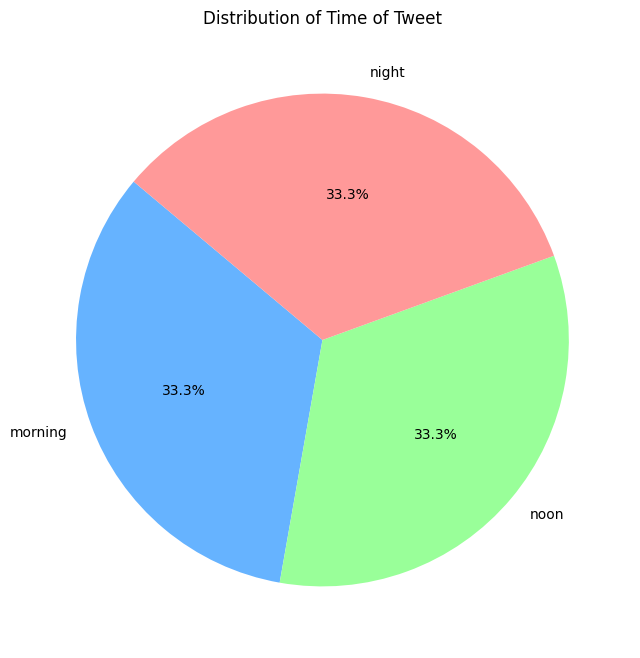

In [ ]:
plt.figure(figsize=(8, 8))
time_counts = df['Time of Tweet'].value_counts()
plt.pie(time_counts, labels=time_counts.index, autopct='%1.1f%%', startangle=140, colors=['#66b3ff','#99ff99','#ff9999','#ffcc99'])
plt.title('Distribution of Time of Tweet')
plt.show()

<Figure size 1200x800 with 0 Axes>

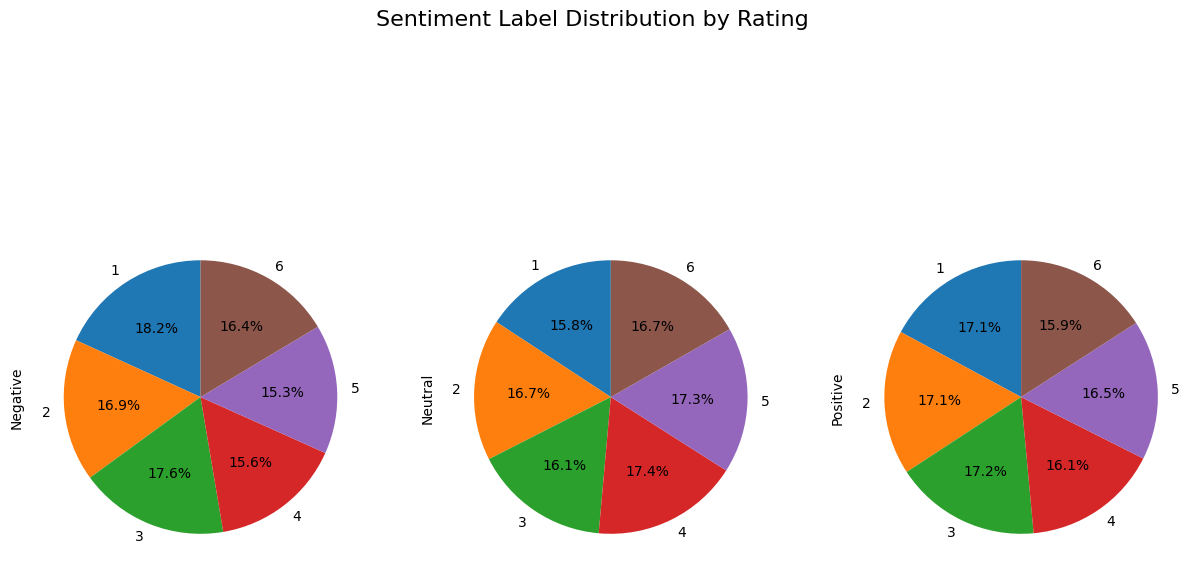

In [ ]:
plt.figure(figsize=(12, 8))
sentiment_by_rating = df.groupby(['rating', 'Sentiment Label']).size().unstack(fill_value=0)
sentiment_by_rating.plot(kind='pie', subplots=True, autopct='%1.1f%%', startangle=90, figsize=(15, 8), legend=False)
plt.suptitle('Sentiment Label Distribution by Rating', fontsize=16)
plt.show()

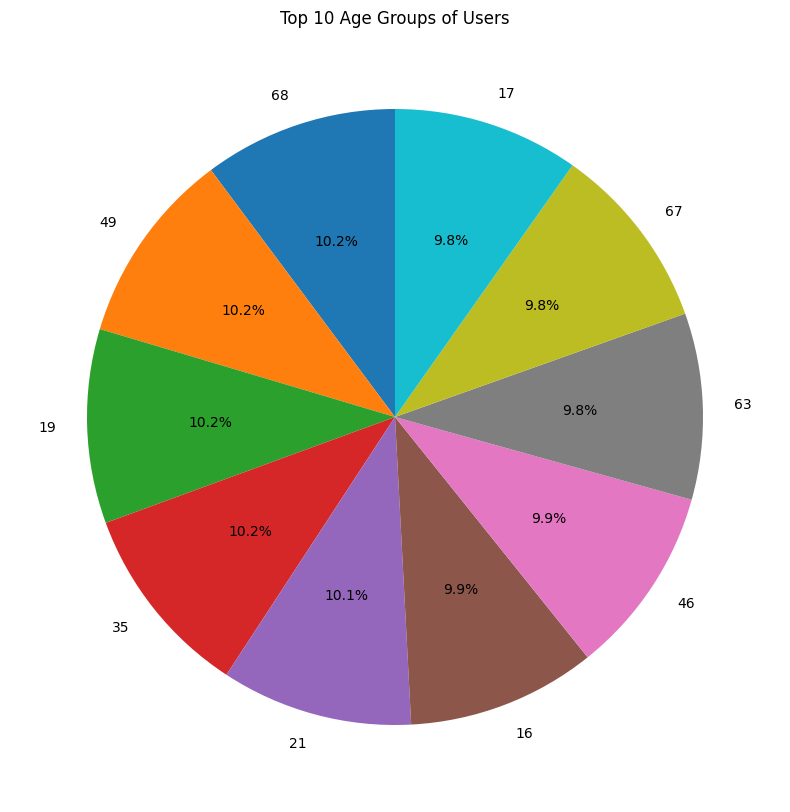

In [ ]:
plt.figure(figsize=(10, 10))
age_counts = df['Age of User'].value_counts().nlargest(10)
plt.pie(age_counts, labels=age_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Top 10 Age Groups of Users')
plt.show()


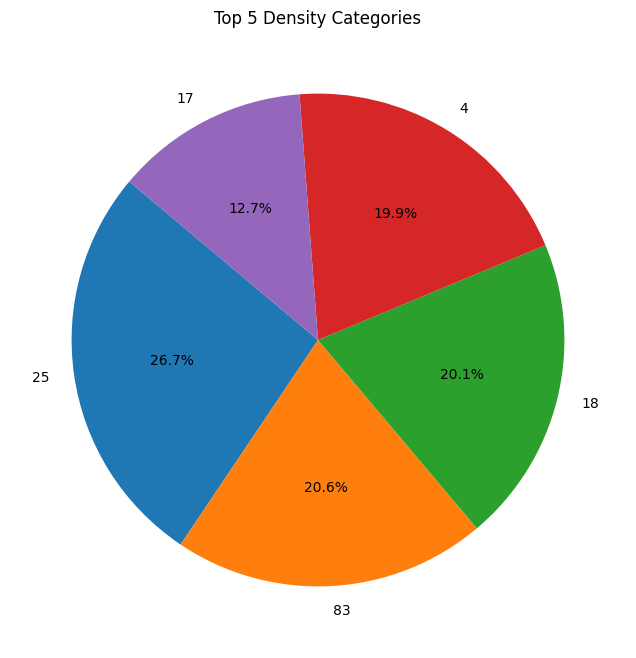

In [ ]:
plt.figure(figsize=(8, 8))
density_counts = df['Density (P/Km²)'].value_counts().nlargest(5)
plt.pie(density_counts, labels=density_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Top 5 Density Categories')
plt.show()

In [ ]:
pip install wordcloud

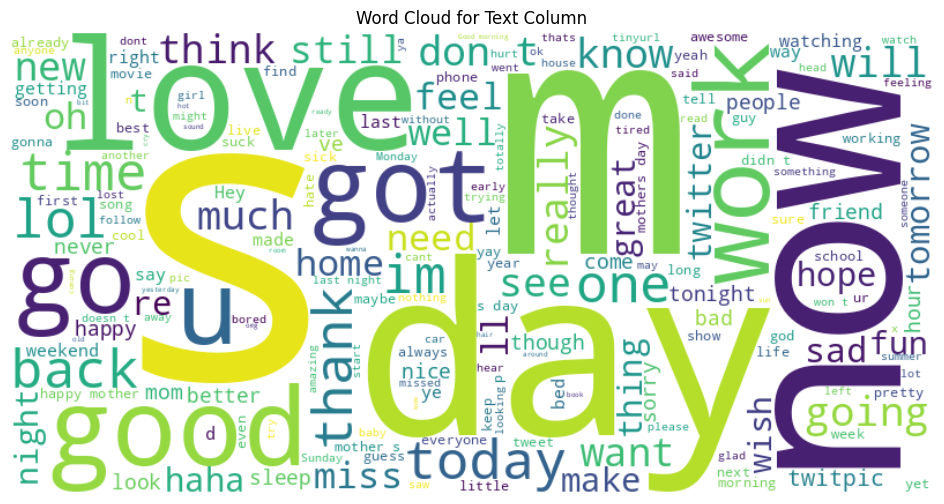

In [ ]:
import pandas as pd

# Citeste datele dintr-un fișier CSV
df = pd.read_csv("Sentiment Analysis Dataset_exported.csv")

# Continuă cu codul pentru Word Cloud
text_data = df['text'].dropna().str.cat(sep=' ')

# Creează un obiect WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_data)

# Plotează Word Cloud
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Text Column')
plt.show()

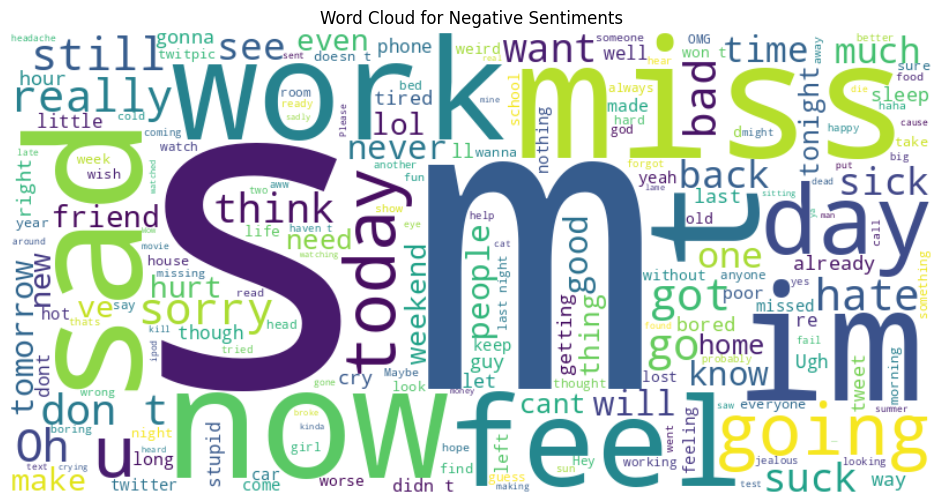

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Filtrarea datelor pentru sentimentul negativ
negative_text_data = df[df['sentiment'] == 'negative']['text'].dropna().str.cat(sep=' ')

# Creează un obiect WordCloud pentru sentimentul negativ
wordcloud_negative = WordCloud(width=800, height=400, background_color='white').generate(negative_text_data)

# Plotează Word Cloud pentru sentimentul negativ
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud_negative, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Negative Sentiments')
plt.show()

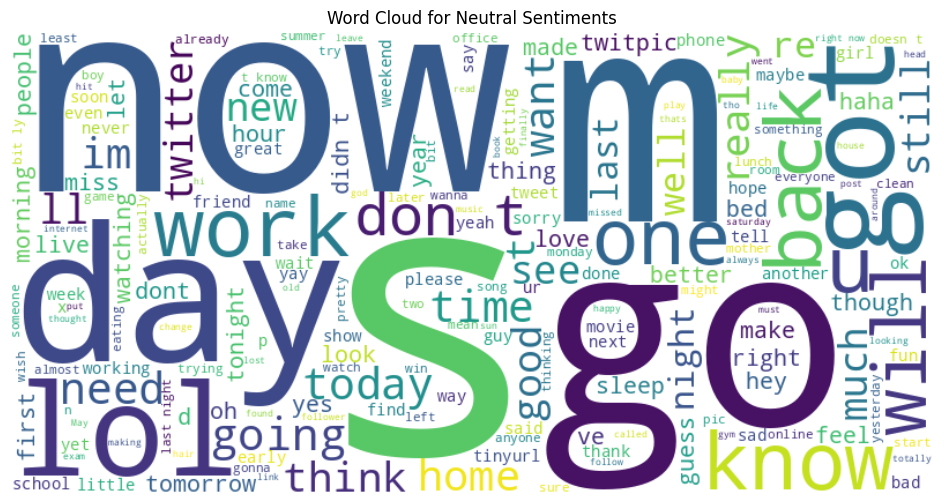

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Filtrarea datelor pentru sentimentul neutru
neutral_text_data = df[df['sentiment'] == 'neutral']['text'].dropna().str.cat(sep=' ')

# Creează un obiect WordCloud pentru sentimentul neutru
wordcloud_neutral = WordCloud(width=800, height=400, background_color='white').generate(neutral_text_data)

# Plotează Word Cloud pentru sentimentul neutru
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud_neutral, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Neutral Sentiments')
plt.show()

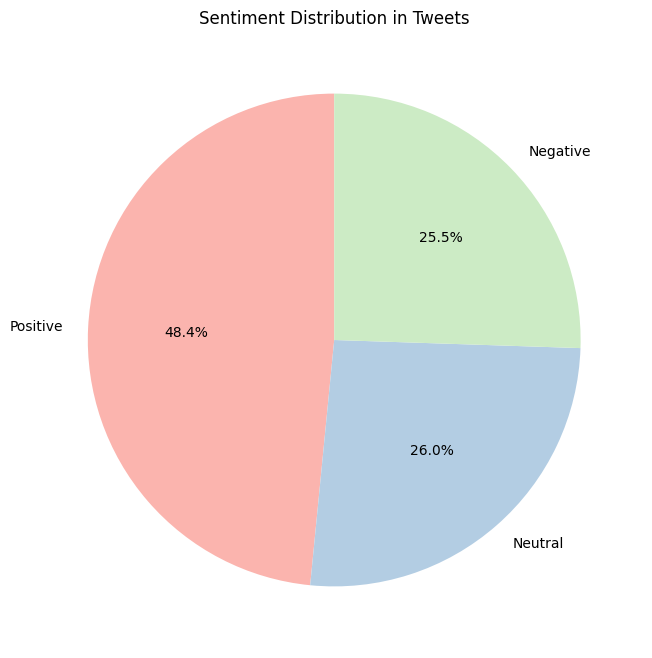

In [ ]:
import matplotlib.pyplot as plt

# Asigură-te că ai importat librăriile necesare și ai definit DataFrame-ul și coloanele corect

# Numără frecvența fiecărui Sentiment Label
sentiment_counts = df['Sentiment Label'].value_counts()

# Definirea unei palete de culori
palette = sns.color_palette("Pastel1", len(sentiment_counts))

# Plotează un grafic de tip pie pentru distribuția sentimentelor cu culori diferite
plt.figure(figsize=(8, 8))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=90, colors=palette)
plt.title('Sentiment Distribution in Tweets')
plt.show()